<a href="https://colab.research.google.com/github/DipankarJDutta/DipankarJDutta-Biomarker-discovery-from-B-T-cells-in-FASD-GDM-with-LSTM/blob/Feature-extraction-with-Shap/LSTM_Shap-values_samples%20ranked%20by%20LI_stripplot-boxplot_GLonly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Fixing random seed to 007 for reproducibility
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)

In [0]:
# Importing essentials
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Load data
dataset = pd.read_csv('Shap values_LSTM_Stripplot-input - GLonly.csv')

In [30]:
# Display all data
dataset.head(56)

,Genes,Shap-values,Learner
0,Tnfaip3,0.002060,Good-learner
1,Tnfaip3,0.002140,Good-learner
2,Tnfaip3,0.001990,Good-learner
3,Tnfaip3,-0.002940,Good-learner
4,Tnfaip3,0.002130,Good-learner
5,Tnfaip3,-0.004460,Good-learner
6,Tnfaip3,0.001820,Good-learner
7,Tnfaip3,-0.000660,Good-learner
8,Tnfaip3,-0.003340,Good-learner
9,Tnfaip3,-0.002090,Good-learner


In [31]:
# Describe the data; 56 samples, range of 0 to 1 (not z-scored)
dataset.describe()

,Shap-values
count,870.000000
mean,0.001238
std,0.008724
min,-0.029300
25%,-0.001547
50%,0.000130
75%,0.002228
max,0.057800


In [0]:
# Set Seaborn Style defaults

# White background; font size and ratio
sns.set(style = 'white', font= 'sans-serif', font_scale=1.25)

# Mark ticks on the X and Y axis
sns.set_style("ticks")

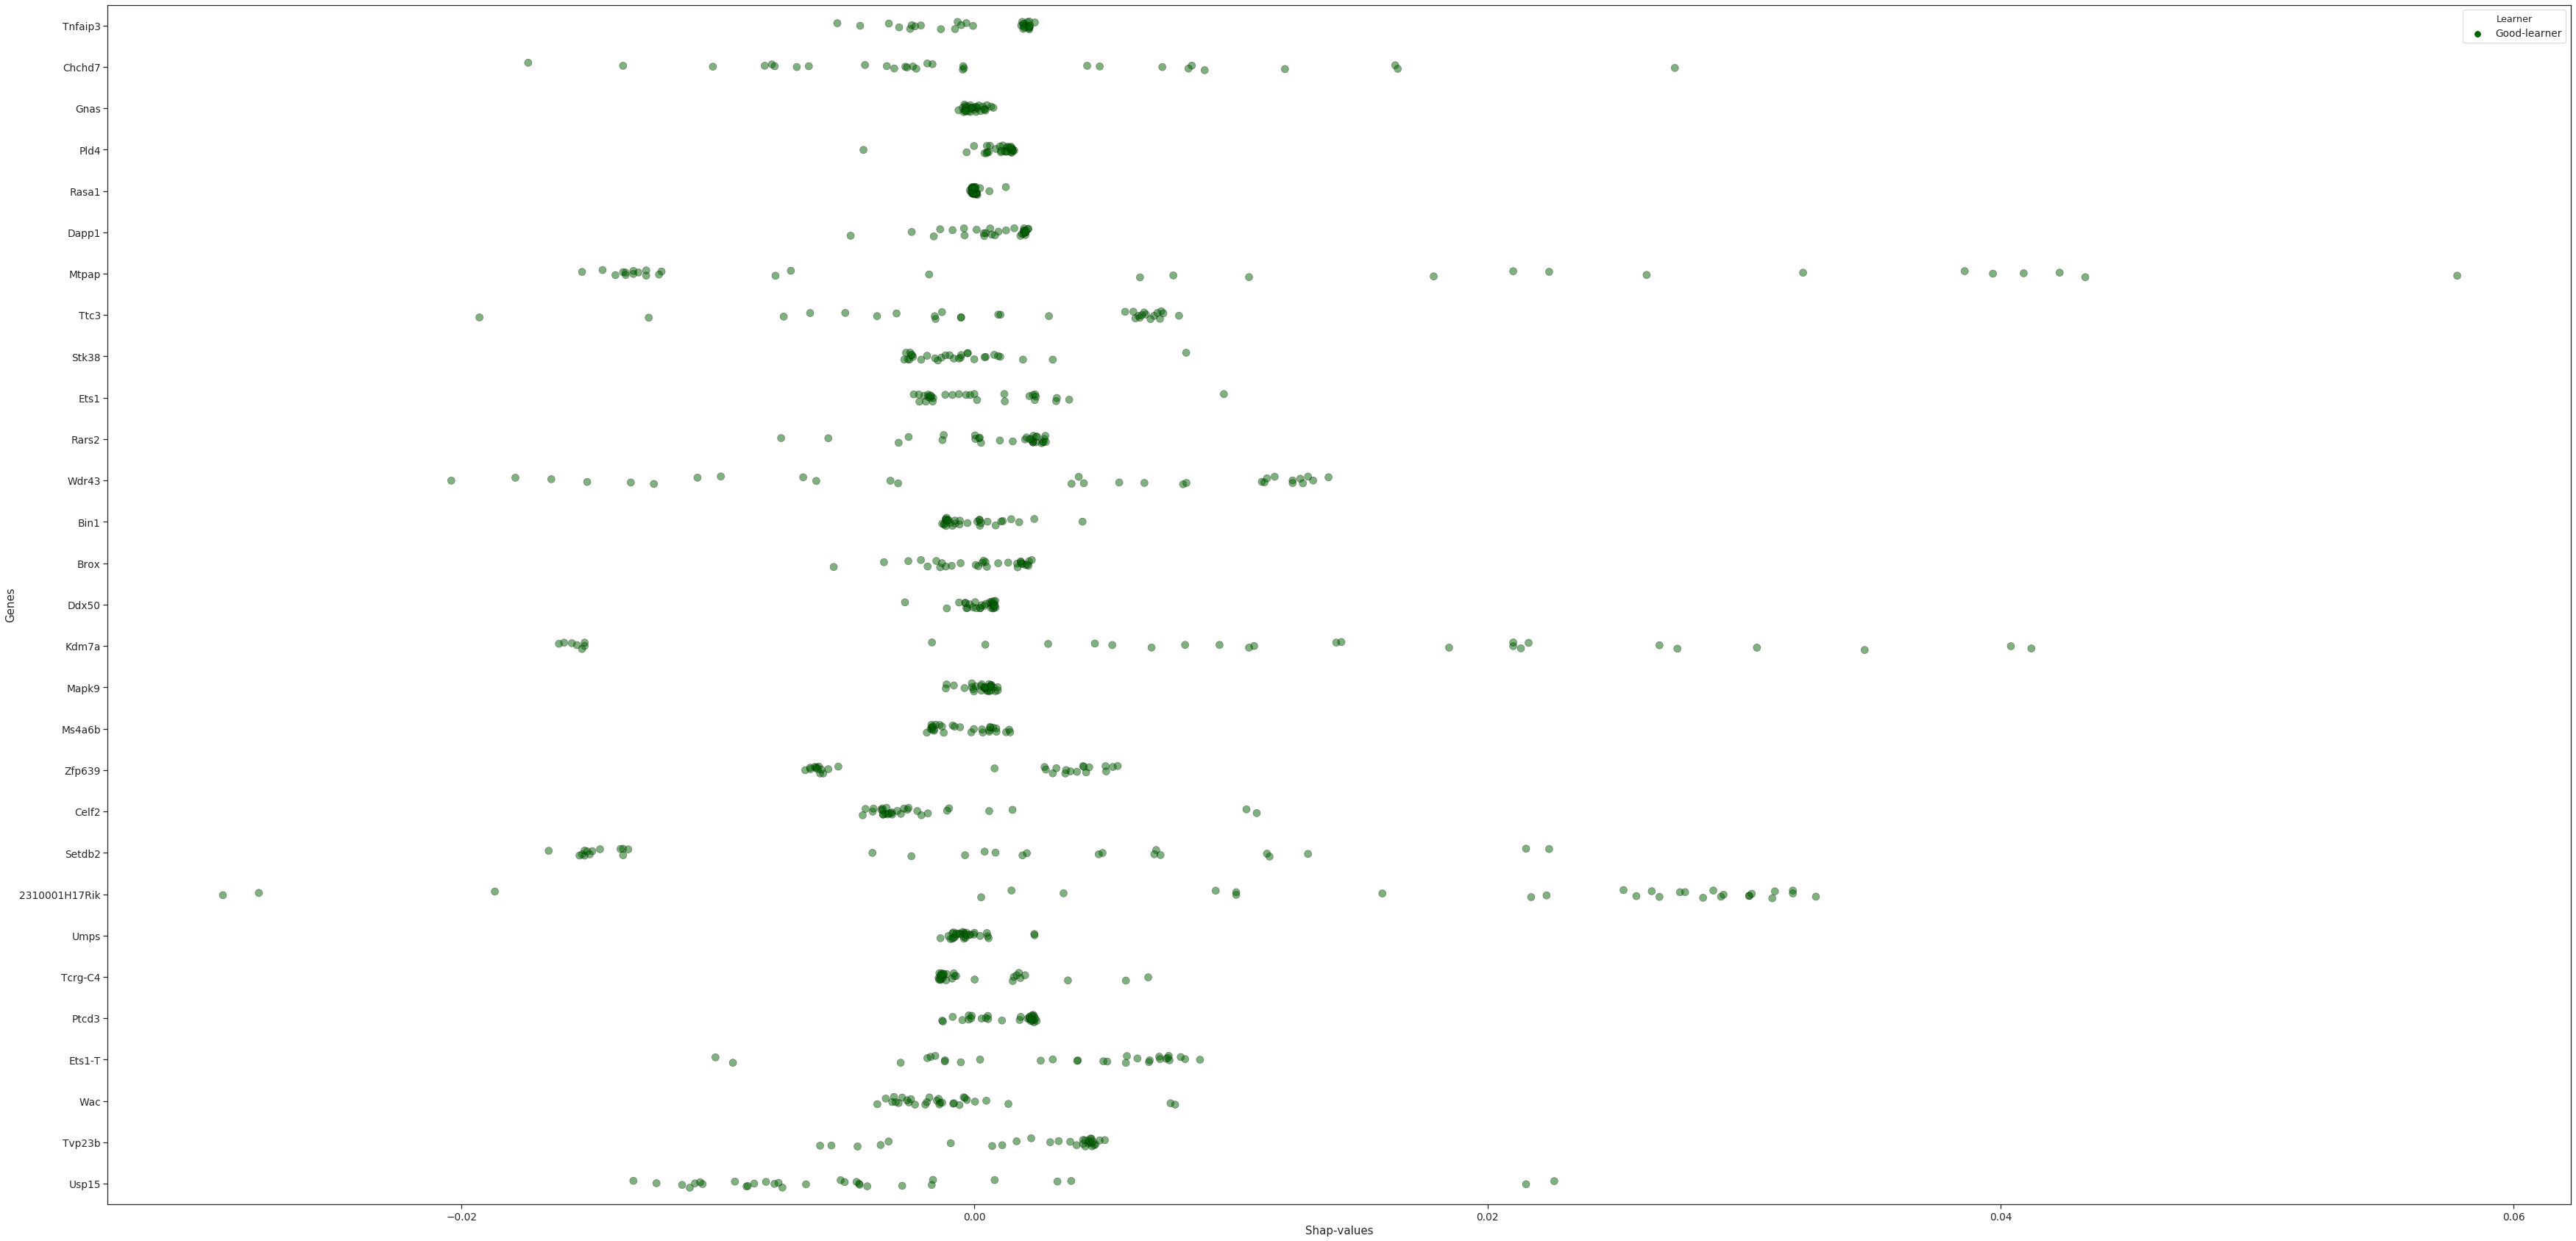

In [33]:
# Strip plot
#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(60,30))

# Create an array with the green and red colors
colors = ["#006400"]

# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

# Plotting the heatmap with the correct aspect ratio
sns.stripplot(x='Shap-values', y='Genes', hue='Learner', data=dataset, linewidth=0.5, dodge=True, size = 10, edgecolor = 'black', alpha=0.50 )

#Save figure as svg
plt.savefig ('Strip-plot_shap_LSTM_GL.svg', format = 'svg')

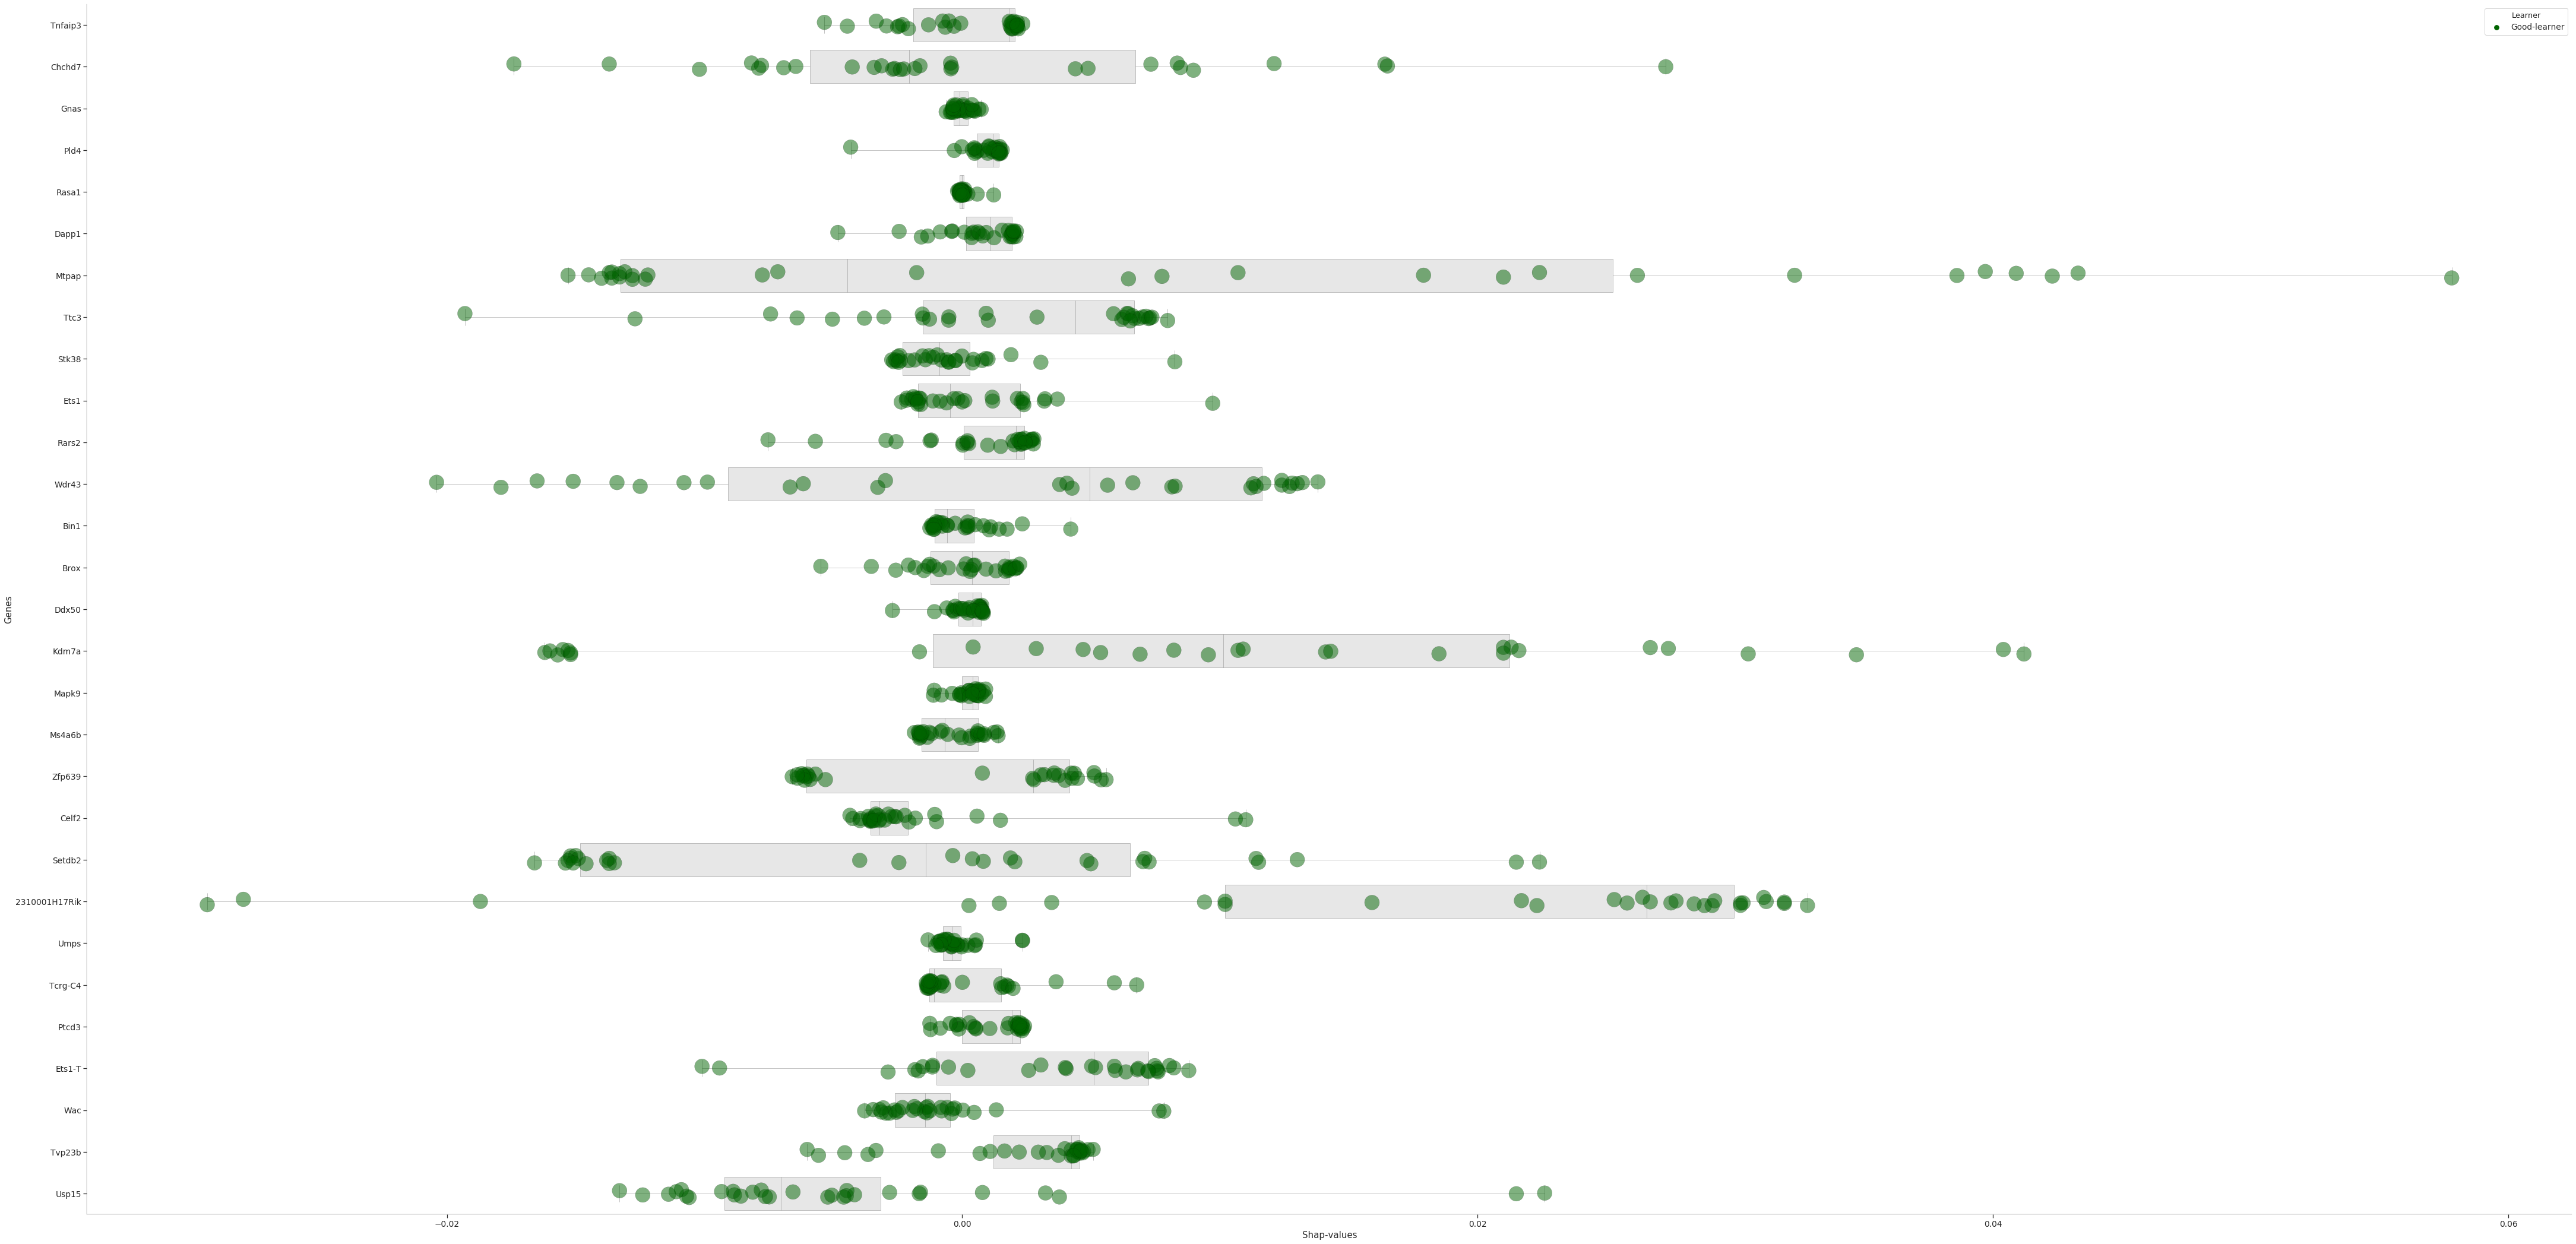

In [36]:
#Set up boxplot on top of dodged strip-plot
#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(75,37.5))
ax = sns.boxplot(x='Shap-values', y='Genes', data=dataset, whis=np.inf, color='#e7e7e7', linewidth=0.5)
ax = sns.stripplot(x='Shap-values', y='Genes', hue='Learner', data=dataset, linewidth=0.25, dodge=True, size = 25, edgecolor = 'black', alpha=0.50, jitter=True)

# Remove top and right border
sns.despine()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.25)

#Save figure as svg
plt.savefig ('Strip-plot_box-plot_shap_LSTM_GL.svg', format = 'svg')